In [ ]:
from google.colab import files
uploaded = files.upload()


Saving site_a_retirer.json to site_a_retirer.json


In [ ]:
df_a_retirer = pd.read_json('site_a_retirer.json')['URL']
def retireLiens(listeSites,liste_A_Retirer = df_a_retirer) :
  listeSites = list(listeSites)
  liste_A_Retirer = list(liste_A_Retirer)
  
  for i in listeSites :
    if i in liste_A_Retirer :
      listeSites.remove(i)
      
  return listeSites

retireLiens(['http://fncdg.com/','http://fncdg.frfcom/','fb'])


  

17


['http://fncdg.frfcom/', 'fb']

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt



In [ ]:
print(list([1,2,3]))

[1, 2, 3]


In [ ]:
df_a_retirer

,Nom,URL,src_url
0,fncdg,http://fncdg.com/,http://fncdg.com/
1,lab-innovation.cget.gouv,http://lab-innovation.cget.gouv.fr/,http://lab-innovation.cget.gouv.fr/
2,public.agedi,http://public.agedi.fr/,http://public.agedi.fr/
4,departements,http://www.departements.fr/,http://www.departements.fr/
5,departements,http://www.departements.fr/actualites/,http://www.departements.fr/
...,...,...,...
106,vie-publique,https://www.vie-publique.fr/actualites-feeds.x...,https://www.vie-publique.fr/
107,vie-publique,https://www.vie-publique.fr/fiches/finances-pu...,https://www.vie-publique.fr/
108,vie-publique,"https://www.vie-publique.fr/finances-publiques',",https://www.vie-publique.fr/
109,viepublique,https://www.viepublique.fr/fiches/finances-pub...,https://www.viepublique.fr/


In [ ]:
import re 



In [ ]:
#opening key word.txt and turning them into lists
with open('Lexique_Gammes_Gestion.txt') as img:
    gestion = img.readlines()
with open('Lexique_Innovation.txt') as img:
    innovation = img.readlines()
for i in range(len(gestion)):
  gestion[i]=gestion[i][:-1]
print(gestion)
for i in range(len(innovation)):
  innovation[i]=innovation[i][:-1]
print(innovation)

['Collectivité territoriale', 'Administration', 'Mairie', 'Commune', "Communauté d'agglomération", 'Intercommunalités', 'Collectivités locales', 'Agglomération', 'Organisation territoriale', 'ville', 'élus', 'Finance', 'Finances publiques', 'Gestion financière', 'Performance publique', 'Analyse financière', 'évaluation des politiques publiques', 'Rapport de la Cour des comptes', 'CAP22', 'Comité action publique', 'Pilotage des dépenses', 'Flux financiers', 'Gestion comptable', 'Gestion de trésorerie', 'Budget', 'Processus achat', 'management opérationnel', 'aide à la décision', 'programmation pluriannuelle', 'PPI', 'PPF', 'trajectoire financière', 'AP', 'APCP', 'CP', 'AP/CP', 'autorisation de programme', 'crédit de paiement', 'gestion budgétaire', 'immobilisation', 'subvention', 'suivi financier et technique des marchés', 'SIGF', 'simulation', 'arbitrage', 'maquette budgétaire', 'bons de commandes', 'factures', 'liquidation', 'signature électronique', 'trésorerie', 'archivage électroni

In [ ]:
#creating a list by making the cartesian product of innovation.txt and gestion.txt
cartesien=[] #the result
for motG in gestion :
  for motI in innovation :
    cartesien.append([motG,motI])
#tests
print(cartesien)
print(len(cartesien))

[['Collectivité territoriale', 'innovation'], ['Collectivité territoriale', 'devops'], ['Collectivité territoriale', 'interopérabilité'], ['Collectivité territoriale', 'migration automatique'], ['Collectivité territoriale', 'idm'], ['Collectivité territoriale', 'mde'], ['Collectivité territoriale', 'ingénierie dirigée par les modèles'], ['Collectivité territoriale', 'ligne de produits'], ['Collectivité territoriale', 'traçabilité'], ['Collectivité territoriale', 'iot'], ['Collectivité territoriale', 'ro'], ['Collectivité territoriale', 'recherche opérationnelle'], ['Collectivité territoriale', 'ml'], ['Collectivité territoriale', 'machine learning'], ['Collectivité territoriale', 'ia'], ['Collectivité territoriale', 'intelligence artificielle'], ['Collectivité territoriale', 'nlp'], ['Collectivité territoriale', 'traitement automatique du langage'], ['Collectivité territoriale', "analyse d'image"], ['Collectivité territoriale', '3d'], ['Collectivité territoriale', 'ihm'], ['Collectivit

In [ ]:
def nom_site(url):
    site=url.split("://")
    
    if site[0]=="https" or site[0]=="http":
        nomsite=site[1]
    else:
        nomsite=site[0]
    
    tab=nomsite.split("/")
    nomsite=tab[0]
    
    
    liste=["fr.","www.","www2.",".org",".fr",".eu",".net",".com"]
    
    for i in liste:
        nomsite = nomsite.replace(i, "")
    
    return(nomsite)
print(nom_site('https://pypi.org/project/beautifulsoup4/'))

pypi


In [ ]:
patternOrganization = re.compile(r'.[.^]+/')


In [ ]:
from urllib.parse import urlparse,urlencode
import random
#function to search on google
def create_google_url(query):
  """Documentation
  Parameters : 
  query : combination of the words that form the link 

  Out: we return a link 


  """
  #we create the arguments of header 
  google_dict = {'q': query, 'num': 100, 'hl' : 'fr'}
  return 'http://www.google.com/search?' + urlencode(google_dict)

#function to turn the cartesian
def combAND(couple):
  return str(couple[0])+' '+'AND'+' '+str(couple[1])

def listToAND(listCouple):
  return [combAND(i) for i in listCouple]

def combOR(tuple):
  final='('+str(tuple[0])+')'
  for i in range(1,len(tuple)):
    final=final+'OR'+'('+tuple[i]+')'
  return final

def listToOR(listTuple):
  return [combOR(i) for i in listTuple]

def listComb(listAND,numbT=2,iteration=int(1000)):
  finalList=[]
  i=0
  while ((len(listAND)>=numbT) and (i<iteration)):
    i+=1
    listRand=random.sample(listAND,numbT)
    for j in listRand :
      listAND.remove(j)
    finalList.append(listRand)
  return finalList

listCouple=cartesien





def URLlistGenerator(listCouple,length,requestNumber=1000):
  """Documentation  
    Parameters :
    ListCouple : list of couples of keywords
    length : length of search equation 
    requestNumber : Number of links returned 

    Out :
    df : Dataframe which contains all links ands search equation 
  """
  #Initialisation of DataFrame
  df = pd.DataFrame(columns=['URL','Query']) 
  #Format changeover 
  lWork=listToAND(listCouple)
  #Selection of queries 
  lWork=listComb(lWork,numbT=length)
  #We change the format of Keywords
  lWork2=listToOR(lWork)
  
  lURL=[]
  #We loop the keywords to generate the links 
  for query in lWork:
    lURL.append(create_google_url(query))
  #column generation
  df['Query'] = lWork
  df['URL'] = lURL
  return df

dataFrame = (URLlistGenerator(listCouple,length=5,requestNumber=1000))
dataFrame['Query'].iloc[0]

['recrutement AND robotique',
 'SIGF AND silver economy',
 'Collectivités locales AND drone',
 'éditions réglementaires AND aide à la décision',
 'pilotage AND bigdata']

In [ ]:
4 colones nom domain
  % de la racine 
  Nom fichier
  % associé 

SyntaxError: ignored

In [ ]:
dataFrame.to_json('df.json')
files.download('df.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
df = pd.read_excel('Mémo jour 1 .xlsx')
print(df.columns)
del df['URL source']
df['Nom du site '] = [nom_site(i) for i in df['URL article']]
lien = 'https://fr.wikipedia.org/wiki/Nuage'
def splitPath(lien) :
  listePath = lien.split('/')[3:]
  for mot in range(len(listePath)) :
    if listePath[mot] =='' :
      listePath.remove('')
  return listePath
df['Chemins split'] = [splitPath(i) for i in df['URL article']]
df['Chemins split String'] = [' '.join(i) for i in df['Chemins split'] ]
df['Path Number'] = np.ones(df.shape[0])
df['Path'] = np.ones(df.shape[0])
df.index = df['Nom du site ']
splitPath(lien)

Index(['Nom du site ', 'URL article', 'URL source'], dtype='object')


['wiki', 'Nuage']

In [ ]:
listeSites = set(df['Nom du site '])
df2 = df.copy()
df2.index = df['Nom du site ']
df3 = df2.copy()
print(listeSites)
for i in listeSites : 
  listeDicos = []
  if (df2[df2['Nom du site '] == i].shape[0])>1 :
    dico ={}
    
    for y in df2.loc[i,'Chemins split'].values :
      
      for mot in range(len(y)) :
        
        sous_groupe = ' '.join(y[:mot+1])
        
        if sous_groupe not in dico.keys() :
          dico[sous_groupe] =1
        else:
          dico[sous_groupe] +=1
    print(dico)
    a=0
    for key in dico.keys() :
      if a ==0 :
        y2 =  df2.loc[i,'Chemins split String']
        y2 = y2[y2['Chemins split String']]
        print(df2[df2['Chemins split String']==y2.values])
      print("-------")
      print(key)
      a+=1

      
  if (df2[df2['Nom du site '] == i].shape[0])==1 :
    a=1


    

    

      
      

          
df2.loc['economie.gouv','Path Number'] 
  
    



In [ ]:

df

#lien racine 
#Article 
1  colonnes pr chaque mot :2
groupby sur lien racine



In [ ]:
dico = {"Nom":{"0":"fncdg","
1":"lab-innovation.cget.gouv","2":"public.agedi","4":"departements","5":"departements","6":"departements","7":"fonction-publique.gouv","8":"fonction-publique.gouv","9":"fonction-publique.gouv","10":"fonction-publique.gouv","11":"fonction-publique.gouv","12":"fonction-publique.gouv","13":"fonction-publique.gouv","14":"fonction-publique.gouv","15":"fonction-publique.gouv","16":"fonction-publique.gouv","17":"innovationreview","18":"lettreducadre","19":"slate","20":"afigese","22":"aife.economie.gouv","23":"blog.soprahr","24":"cnnumerique","25":"financeactive","26":"financeactive","27":"financeactive","28":"gfi.world","30":"usbeketrica","31":"actuia","32":"adcf","34":"adcf","35":"adcf","36":"adgcf","38":"adgcf","39":"amf.asso","40":"amf.asso","41":"apvf.asso","43":"association-sdds","46":"association-sdds","47":"banquedesterritoires","48":"ccomptes","49":"ccomptes","50":"cegid","52":"cgi","54":"cig929394","56":"cig929394","57":"ciril","59":"citopia","61":"cnfpt","63":"cnfpt","64":"cohesion-territoires.gouv","66":"cohesion-territoires.gouv","67":"collectivites-locales.gouv","68":"economie.gouv","70":"economie.gouv","71":"eksae","73":"eksae","74":"fonction-publique.gouv","76":"idcite","77":"jvs-mairistem","79":"jvs-mairistem","80":"la-fabrique","81":"ladn","82":"lagazettedescommunes","83":"larevuedudigital","84":"latribune","85":"lemagdesterritoiresnumeriques","86":"lepoint","87":"lesechos","88":"mgdis","90":"mgdis","91":"net-entreprises","93":"sage","95":"sage","96":"sndgct","97":"sndgct","98":"soprahr","100":"technologyreview","101":"usine-digitale","103":"usine-digitale","104":"vie-publique","106":"vie-publique","107":"vie-publique","108":"vie-publique","109":"viepublique","110":"villeintelligente-mag"},"URL":{"0":"http:\/\/fncdg.com\/","1":"http:\/\/lab-innovation.cget.gouv.fr\/","2":"http:\/\/public.agedi.fr\/","4":"http:\/\/www.departements.fr\/","5":"http:\/\/www.departements.fr\/actualites\/ ","6":"http:\/\/www.departements.fr\/feed', 'https:\/\/afigese.fr\/feed',","7":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/11255',","8":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2207',","9":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2208',","10":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2209',","11":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2210',","12":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2211',","13":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2212',","14":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2213',","15":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2214',","16":"http:\/\/www.fonction-publique.gouv.fr\/rss\/categorie\/2215',","17":"http:\/\/www.innovationreview.eu\/tic-numerique.php","18":"http:\/\/www.lettreducadre.fr\/","19":"http:\/\/www.slate.fr\/","20":"https:\/\/afigese.fr\/","22":"https:\/\/aife.economie.gouv.fr\/","23":"https:\/\/blog.soprahr.com\/feed\/', 'https:\/\/www.cegid.com\/fr\/blog\/',","24":"https:\/\/cnnumerique.fr\/","25":"https:\/\/financeactive.com\/","26":"https:\/\/financeactive.com\/fr\/actus\/","27":"https:\/\/financeactive.com\/fr\/actus\/'","28":"https:\/\/gfi.world\/fr-fr\/actualites\/actualite\/liste","30":"https:\/\/usbeketrica.com\/fr","31":"https:\/\/www.actuia.com\/","32":"https:\/\/www.adcf.org\/","34":"https:\/\/www.adcf.org\/administration-et-ressources-humaines',","35":"https:\/\/www.adcf.org\/finances-et-fiscalite',","36":"https:\/\/www.adgcf.fr\/","38":"https:\/\/www.adgcf.fr\/rss.php', 'https:\/\/www.sndgct.fr\/rss.xml',","39":"https:\/\/www.amf.asso.fr\/","40":"https:\/\/www.amf.asso.fr\/m\/face-aux-crises\/","41":"https:\/\/www.apvf.asso.fr\/","43":"https:\/\/www.association-sdds.org","46":"https:\/\/www.association-sdds.org\/feed\/', 'http:\/\/fncdg.com\/feed\/',","47":"https:\/\/www.banquedesterritoires.fr\/edition-localtis","48":"https:\/\/www.ccomptes.fr\/fr\/flux-rss","49":"https:\/\/www.ccomptes.fr\/rss\/actualites',","50":"https:\/\/www.cegid.com\/fr\/blog\/","52":"https:\/\/www.cgi.fr\/fr-fr\/blog\/secteur-public","54":"https:\/\/www.cig929394.fr\/grh\/actualite","56":"https:\/\/www.cig929394.fr\/grh\/actualite',","57":"https:\/\/www.ciril.net\/fr\/","59":"https:\/\/www.citopia.fr\/","61":"https:\/\/www.cnfpt.fr\/sinformer\/nos-actualites\/les-actualites","63":"https:\/\/www.cnfpt.fr\/sinformer\/nos-actualites\/les-actualites',","64":"https:\/\/www.cohesion-territoires.gouv.fr\/actualites","66":"https:\/\/www.cohesion-territoires.gouv.fr\/actualites?field_news_format%5B283%5D=283&field_news_format%5B291%5D=291&op=Voir+les+r%C3%A9sultats&form_build_id=form-jtTkjvTTjq3wq0ZjIqoAgufGnhVTT9k0o72WHJF6',","67":"https:\/\/www.collectivites-locales.gouv.fr\/finances-locales","68":"https:\/\/www.economie.gouv.fr\/dgfip","70":"https:\/\/www.economie.gouv.fr\/rss\/toutesactualites',","71":"https:\/\/www.eksae.fr\/","73":"https:\/\/www.eksae.fr\/feed',","74":"https:\/\/www.fonction-publique.gouv.fr\/flux-rss","76":"https:\/\/www.idcite.com\/","77":"https:\/\/www.jvs-mairistem.fr\/","79":"https:\/\/www.jvs-mairistem.fr\/actualites',","80":"https:\/\/www.la-fabrique.fr\/fr\/","81":"https:\/\/www.ladn.eu\/","82":"https:\/\/www.lagazettedescommunes.com\/","83":"https:\/\/www.larevuedudigital.com\/","84":"https:\/\/www.latribune.fr\/media-telecom-entreprise\/","85":"https:\/\/www.lemagdesterritoiresnumeriques.com\/","86":"https:\/\/www.lepoint.fr\/high-tech-internet\/","87":"https:\/\/www.lesechos.fr\/tech-medias","88":"https:\/\/www.mgdis.fr\/","90":"https:\/\/www.mgdis.fr\/feed',","91":"https:\/\/www.net-entreprises.fr\/","93":"https:\/\/www.sage.com\/fr-fr\/blog\/","95":"https:\/\/www.sage.com\/fr-fr\/blog\/feed',","96":"https:\/\/www.sndgct.fr\/","97":"https:\/\/www.sndgct.fr\/Actualites\/toutes ","98":"https:\/\/www.soprahr.com\/fr","100":"https:\/\/www.technologyreview.com\/","101":"https:\/\/www.usine-digitale.fr\/digital-rh\/","103":"https:\/\/www.usine-digitale.fr\/digital-rh\/',","104":"https:\/\/www.vie-publique.fr\/actualites","106":"https:\/\/www.vie-publique.fr\/actualites-feeds.xml',","107":"https:\/\/www.vie-publique.fr\/fiches\/finances-publiques","108":"https:\/\/www.vie-publique.fr\/finances-publiques',","109":"https:\/\/www.viepublique.fr\/fiches\/finances-publiques","110":"https:\/\/www.villeintelligente-mag.fr\/"},"src_url":{"0":"http:\/\/fncdg.com\/","1":"http:\/\/lab-innovation.cget.gouv.fr\/","2":"http:\/\/public.agedi.fr\/","4":"http:\/\/www.departements.fr\/","5":"http:\/\/www.departements.fr\/","6":"http:\/\/www.departements.fr\/","7":"http:\/\/www.fonction-publique.gouv.fr\/","8":"http:\/\/www.fonction-publique.gouv.fr\/","9":"http:\/\/www.fonction-publique.gouv.fr\/","10":"http:\/\/www.fonction-publique.gouv.fr\/","11":"http:\/\/www.fonction-publique.gouv.fr\/","12":"http:\/\/www.fonction-publique.gouv.fr\/","13":"http:\/\/www.fonction-publique.gouv.fr\/","14":"http:\/\/www.fonction-publique.gouv.fr\/","15":"http:\/\/www.fonction-publique.gouv.fr\/","16":"http:\/\/www.fonction-publique.gouv.fr\/","17":"http:\/\/www.innovationreview.eu\/","18":"http:\/\/www.lettreducadre.fr\/","19":"http:\/\/www.slate.fr\/","20":"https:\/\/afigese.fr\/","22":"https:\/\/aife.economie.gouv.fr\/","23":"https:\/\/blog.soprahr.com\/","24":"https:\/\/cnnumerique.fr\/","25":"https:\/\/financeactive.com\/","26":"https:\/\/financeactive.com\/","27":"https:\/\/financeactive.com\/","28":"https:\/\/gfi.world\/","30":"https:\/\/usbeketrica.com\/","31":"https:\/\/www.actuia.com\/","32":"https:\/\/www.adcf.org\/","34":"https:\/\/www.adcf.org\/","35":"https:\/\/www.adcf.org\/","36":"https:\/\/www.adgcf.fr\/","38":"https:\/\/www.adgcf.fr\/","39":"https:\/\/www.amf.asso.fr\/","40":"https:\/\/www.amf.asso.fr\/","41":"https:\/\/www.apvf.asso.fr\/","43":null,"46":"https:\/\/www.association-sdds.org\/","47":"https:\/\/www.banquedesterritoires.fr\/","48":"https:\/\/www.ccomptes.fr\/","49":"https:\/\/www.ccomptes.fr\/","50":"https:\/\/www.cegid.com\/","52":"https:\/\/www.cgi.fr\/","54":"https:\/\/www.cig929394.fr\/","56":"https:\/\/www.cig929394.fr\/","57":"https:\/\/www.ciril.net\/","59":"https:\/\/www.citopia.fr\/","61":"https:\/\/www.cnfpt.fr\/","63":"https:\/\/www.cnfpt.fr\/","64":"https:\/\/www.cohesion-territoires.gouv.fr\/","66":"https:\/\/www.cohesion-territoires.gouv.fr\/","67":"https:\/\/www.collectivites-locales.gouv.fr\/","68":"https:\/\/www.economie.gouv.fr\/","70":"https:\/\/www.economie.gouv.fr\/","71":"https:\/\/www.eksae.fr\/","73":"https:\/\/www.eksae.fr\/","74":"https:\/\/www.fonction-publique.gouv.fr\/","76":"https:\/\/www.idcite.com\/","77":"https:\/\/www.jvs-mairistem.fr\/","79":"https:\/\/www.jvs-mairistem.fr\/","80":"https:\/\/www.la-fabrique.fr\/","81":"https:\/\/www.ladn.eu\/","82":"https:\/\/www.lagazettedescommunes.com\/","83":"https:\/\/www.larevuedudigital.com\/","84":"https:\/\/www.latribune.fr\/","85":"https:\/\/www.lemagdesterritoiresnumeriques.com\/","86":"https:\/\/www.lepoint.fr\/","87":"https:\/\/www.lesechos.fr\/","88":"https:\/\/www.mgdis.fr\/","90":"https:\/\/www.mgdis.fr\/","91":"https:\/\/www.net-entreprises.fr\/","93":"https:\/\/www.sage.com\/","95":"https:\/\/www.sage.com\/","96":"https:\/\/www.sndgct.fr\/","97":"https:\/\/www.sndgct.fr\/","98":"https:\/\/www.soprahr.com\/","100":"https:\/\/www.technologyreview.com\/","101":"https:\/\/www.usine-digitale.fr\/","103":"https:\/\/www.usine-digitale.fr\/","104":"https:\/\/www.vie-publique.fr\/","106":"https:\/\/www.vie-publique.fr\/","107":"https:\/\/www.vie-publique.fr\/","108":"https:\/\/www.vie-publique.fr\/","109":"https:\/\/www.viepublique.fr\/","110":"https:\/\/www.villeintelligente-mag.fr\/"}}

In [ ]:
def splitPath(lien) :
  listePath = lien.split('/')[3:]
  for mot in range(len(listePath)) :
    if listePath[mot] =='' :
      listePath.remove('')
  return listePath

df['Chemins split'] = [splitPath(i) for i in df['URL article']]


In [ ]:
df = pd.read_excel('Mémo jour 1 .xlsx')
lien = 'https://fr.wikipedia.org/wiki/Nuage'
def lienRacine(lienArticle) :
  split = lienArticle.split('/')
  return (split[0]+'//'+split[2])
df.columns = ['nom_site','art_url','URL source']
df.iloc[20:50]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


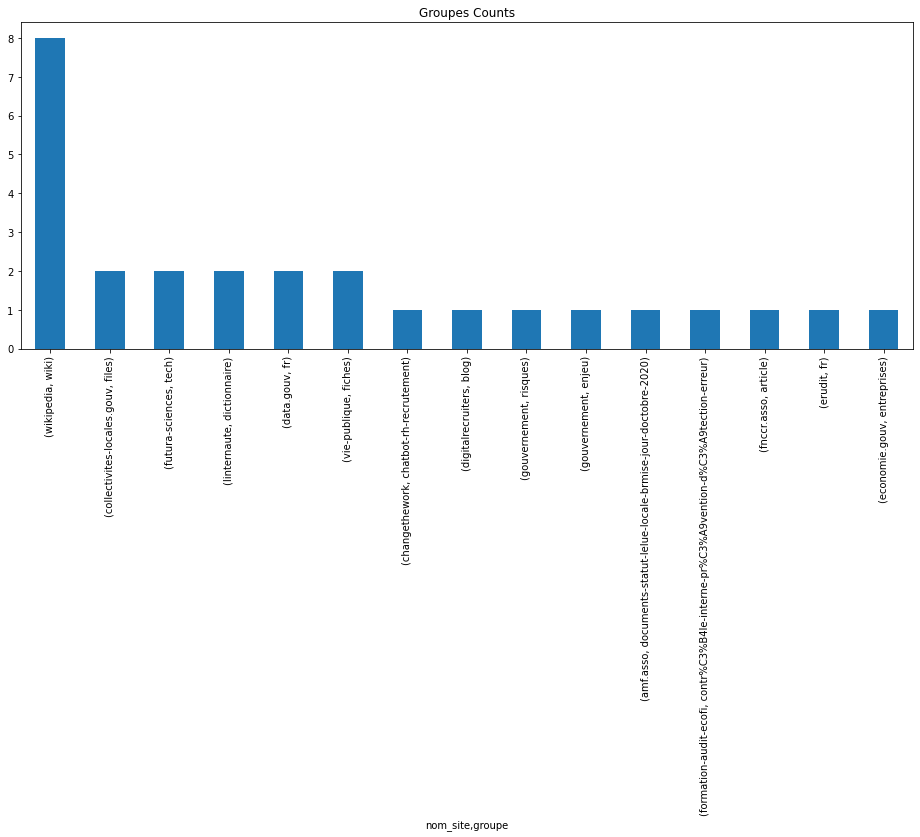

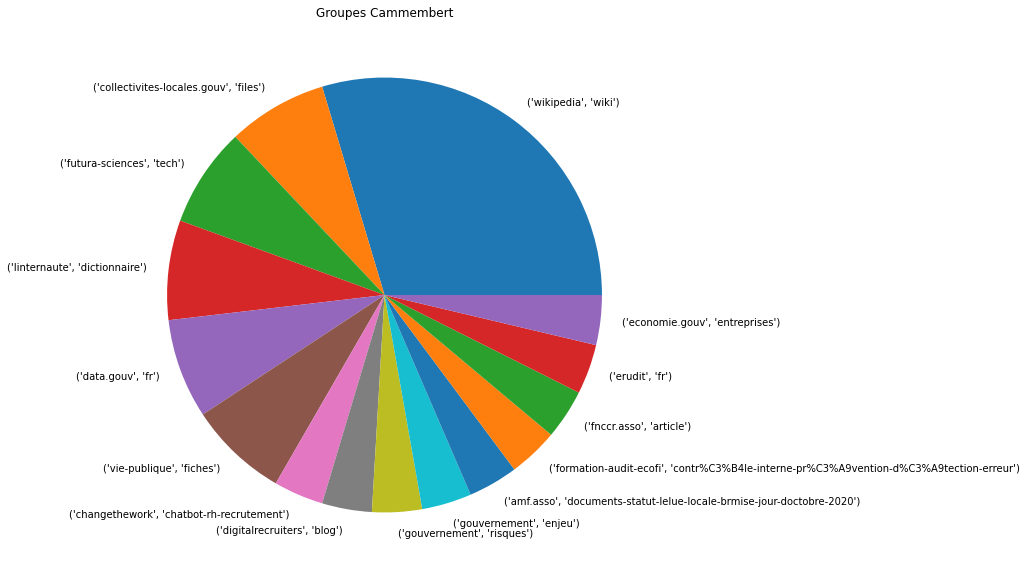

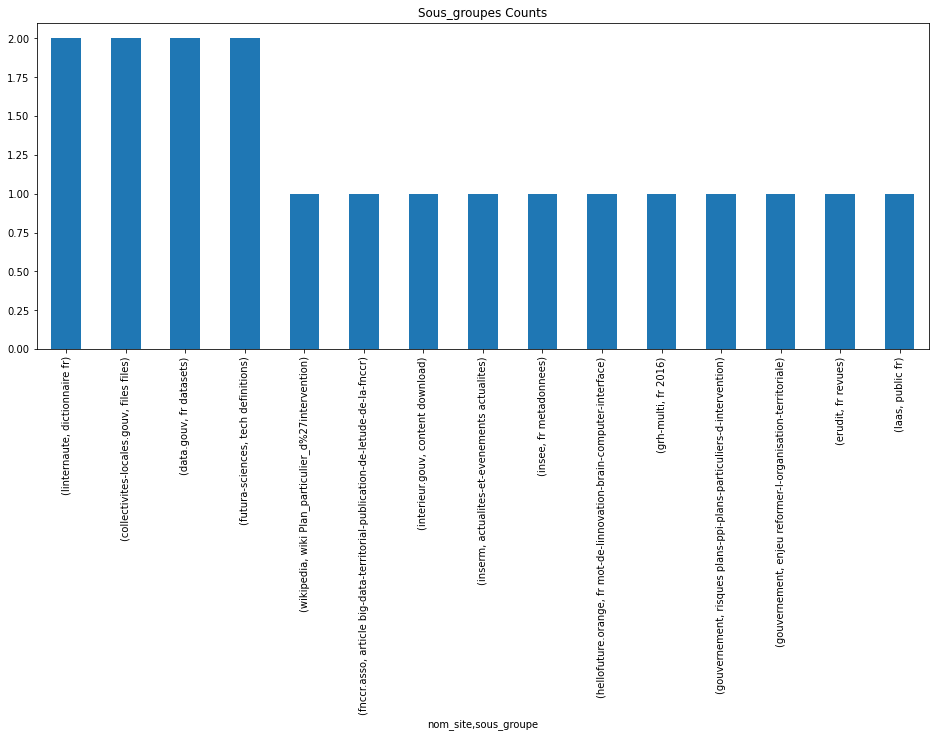

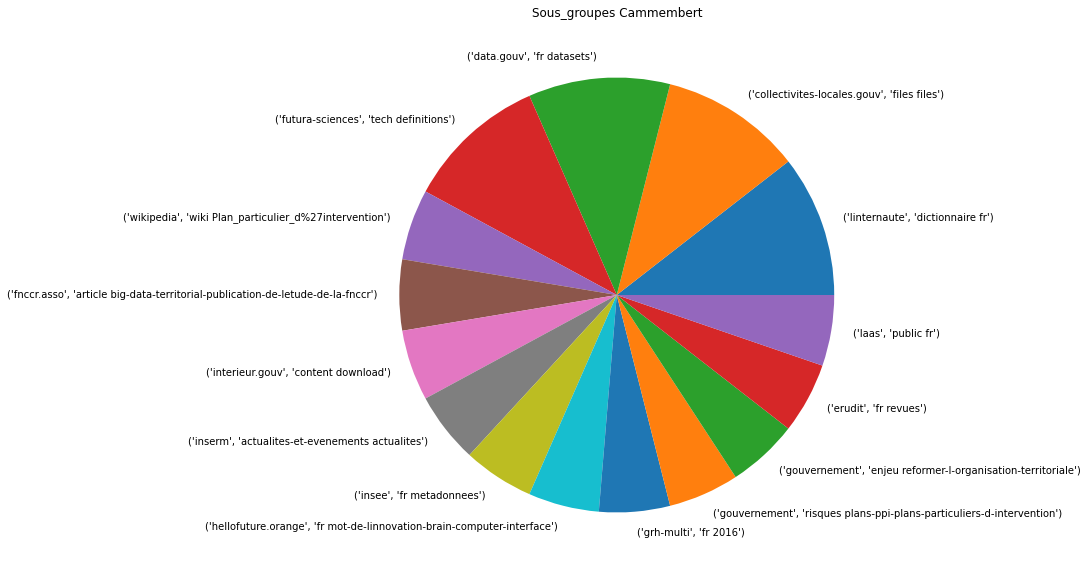

In [ ]:
def analyseGroupe(data,number=20) :
  data2 = data.copy()
  data['nom_site']  =[nom_site(i) for i in data['art_url']]
  data['site_url'] = [lienRacine(i) for i in data['art_url']]
  data['Chemins split'] = [splitPath(i) for i in data['art_url']]
  data['groupe'] = np.zeros(data.shape[0])
  data['sous_groupe'] = np.zeros(data.shape[0])

  for words in range(data['Chemins split'].shape[0]):
    if len(data['Chemins split'].iloc[words])>1 :
      data['groupe'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = data['Chemins split'].iloc[words][0] +' '+data['Chemins split'].iloc[words][1]
    if len(data['Chemins split'].iloc[words])==1 :
      data['groupe'].iloc[words] = data['Chemins split'].iloc[words][0]
      data['sous_groupe'].iloc[words] = np.nan

    if len(data['Chemins split'].iloc[words])==0 :
      data['groupe'].iloc[words] = np.nan
      data['sous_groupe'].iloc[words] = np.nan

  plt.title('Groupes Counts')
  data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()


  plt.title('Groupes Cammembert')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number], labels = data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number].index )
  plt.show()



  plt.title('Sous_groupes Counts')
  data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].plot(kind='bar',figsize=(16,6))
  plt.show()
  plt.title('Sous_groupes Cammembert')
  fig = plt.gcf()
  fig.set_size_inches(10,10)
  plt.pie( data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number], labels = data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number].index)
  #df.plot.pie(y=....,figsize())
  plt.show()
 
  #print(data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False))
  
  #data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  #data.groupby(['nom_site','groupe'])['groupe'].count().plot(kind='bar',figsize=(16,6))
  #plt.show()
  
  return data,data.groupby(['nom_site','groupe'])['groupe'].count().sort_values(ascending=False).iloc[:number],data.groupby(['nom_site','sous_groupe'])['sous_groupe'].count().sort_values(ascending=False).iloc[:number]

analyseGroupe(df,15)
a=1

In [ ]:
def statLinks(data) :
  data2 = data.copy()
  for path in data2['']

In [ ]:
df[df['nom_site']=='fr.wikipedia.org']

,nom_site,art_url,URL source,site_url,Chemins split,groupe,sous_groupe


In [ ]:
df

,nom_site,art_url,URL source,site_url,Chemins split,groupe,sous_groupe
0,FNCCR,https://www.fnccr.asso.fr/article/big-data-ter...,https://www.fnccr.asso.fr/,https://www.fnccr.asso.fr,"[article, big-data-territorial-publication-de-...",article,big-data-territorial-publication-de-letude-de-...
1,Banque des territoires,https://www.banquedesterritoires.fr/big-data-t...,https://www.banquedesterritoires.fr/,https://www.banquedesterritoires.fr,[big-data-territorial-la-gestion-des-donnees-u...,big-data-territorial-la-gestion-des-donnees-un...,NaN
2,theinnovation,https://www.theinnovation.eu/comment-tuer-linn...,https://www.theinnovation.eu/,https://www.theinnovation.eu,[comment-tuer-linnovation-avec-lanalyse-financ...,comment-tuer-linnovation-avec-lanalyse-financiere,45
3,LeMondeInformatique,https://www.lemondeinformatique.fr/actualites/...,https://www.lemondeinformatique.fr/,https://www.lemondeinformatique.fr,"[actualites, lire-les-salaries-et-les-dirigean...",actualites,lire-les-salaries-et-les-dirigeants-percoivent...
4,CNIL,https://www.cnil.fr/fr/les-collectivites-terri...,https://www.cnil.fr/,https://www.cnil.fr,"[fr, les-collectivites-territoriales-et-lopen-...",fr,les-collectivites-territoriales-et-lopen-data-...
...,...,...,...,...,...,...,...
65,SAP,https://www.sap.com/france/products/erp-financ...,https://www.sap.com,https://www.sap.com,"[france, products, erp-financial-management, g...",france,products
66,usine-digitale,https://www.usine-digitale.fr/bases-de-donnees/,https://www.usine-digitale.fr,https://www.usine-digitale.fr,[bases-de-donnees],bases-de-donnees,NaN
67,Vie publique,https://www.vie-publique.fr/fiches/20126-les-c...,https://www.vie-publique.fr,https://www.vie-publique.fr,"[fiches, 20126-les-communautes-dagglomeration]",fiches,20126-les-communautes-dagglomeration
68,Vie publique,https://www.vie-publique.fr/fiches/lintercommu...,https://www.vie-publique.fr,https://www.vie-publique.fr,"[fiches, lintercommunalite-0]",fiches,lintercommunalite-0


In [ ]:
uploaded = files.upload()

Saving df.json to df (1).json


In [ ]:
pd.read_json('df.json')['Query'].iloc[0]

['Mairie AND si', 'procédures de marchés publics AND optimisation']

In [ ]:
lR=[]
lR.append(['recherche opérationnelle','ro'])
lR.append(['machine learning','ml'])
lR.append(['intelligence artificielle','ia'])
lR.append(['visualisation de données','datavis','data-visualisation','visualisation d''informations','infovis'])
lR.append(['réalité augmentée','ar','vr','mr','réalité virtuelle','réalité mixte'])
lR.append(['robot','robotique','robotique sociale'])
lR.append(['systèmes d''information','si','sig'])
lR.append(['abstract description language','adl'])
lR.append(['base de données','bd','data base'])
lR.append(['big data','bigdata','big-data'])
lR.append(['jumeau numérique','digital twin'])
lR.append(['augmenteds intelligence','explainable ai','edge ai','ai paas'])
lR.append(['graphes de connaissances','knowledge graphs'])
lR.append(['ontologie','ontologies'])
lR.append(['brain machine interface','bmi'])
lR.append(['ville numérique','smart city'])
lR.append(['université 4.0','université du futur'])
lR.append(['système de recommandation','moteur de recommandation'])
lR.append(['4.0','industrie 4.0','du futur'])
lR.append(['DIY','do it yourself'])
lR.apppend(['ingénierie dirigée par les modèles','idm'])
lR.append(['user experience','ux'])

lR2=[]
lR2.append(['Intercommunalités','Communauté d''agglomération'])
lR2.append(['ville','Agglomération'])
lR2.append(['Collectivité territoriale','Organisation territoriale'])
lR2.append(['Finance','Finances publiques'])
lR2.append(['APCP','AP/CP','CP'])
lR2.append(['Gestion comptable','Gestion de trésorerie'])
lR2.append(['comptabilité','chaîne comptable'])
lR2.append(['dette','gestion de la dette'])
lR2.append(['Ressources humaines','RH'])
lR2.append(['Paie','Gestion de la paie'])

lS=[]
lS.append('iot')
lS.append('nsga')
lS.append('rpa')
lS.append('bci')











gestion.remove('Collectivité territoriale')
print(gestion)

AttributeError: ignored

In [ ]:
totale=0
for i in range(70):
  for j in range(70):
    totale+=1
print(totale)

4900
